## Лабораторная работа №1

##### Задача 1: Проведите анализ скорости работы всех рассмотренных алгоритмов  поиска на массиве, состоящем из 100 случайных значений (значения от 1 до 1000).  В качестве искомого возьмите элемент, индекс которого будет 5. 

In [19]:
import numpy as np
import time
import matplotlib.pyplot as plt

Алгоритмы поиска

In [41]:
# Функция линейного поиска
def linear_search(arr, target):
    for i in range(len(arr)):
        if arr[i] == target:
            return i
    return -1

# Функция бинарного поиска
def binary_search(arr, target):
    low = 0
    high = len(arr) - 1
    while low <= high:
        mid = (low + high) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            low = mid + 1
        else:
            high = mid - 1
    return -1

# Функция jump search
def jump_search(arr, target):
    n = len(arr)
    step = int(np.sqrt(n))
    prev = 0
    while arr[min(step, n)-1] < target:
        prev = step
        step += int(np.sqrt(n))
        if prev >= n:
            return -1
    for i in range(prev, min(step, n)):
        if arr[i] == target:
            return i
    return -1

# Функция поиска Фибоначчи
def fibonacci_search(arr, target):
    fibonacci_numbers = [0, 1]
    while fibonacci_numbers[-1] < len(arr):
        fibonacci_numbers.append(fibonacci_numbers[-1] + fibonacci_numbers[-2])
    offset = 0
    index = -1
    while fibonacci_numbers:
        fib = fibonacci_numbers.pop()
        new_index = offset + fib
        if new_index >= len(arr):
            continue
        if arr[new_index] == target:
            index = new_index
            break
        elif arr[new_index] < target:
            offset += fib
    return index

# Функция экспоненциального поиска
def exponential_search(arr, target):
    n = len(arr)
    if arr[0] == target:
        return 0
    i = 1
    while i < n and arr[i] <= target:
        i *= 2
    return binary_search(arr[:min(i, n)], target)

# Функция интерполяционного поиска
def interpolation_search(arr, target):
    low = 0
    high = len(arr) - 1
    while low <= high and target >= arr[low] and target <= arr[high]:
        pos = int(low + (high - low) / (arr[high] - arr[low]) * (target - arr[low]))
        if arr[pos] == target:
            return pos
        if arr[pos] < target:
            low = pos + 1
        else:
            high = pos - 1
    return -1

Создание массива из 100 случайных значений от 1 до 1000 и его сортировка 

In [34]:
arr = np.random.randint(1, 1001, 100)
arr.sort()

Проведение анализа скорости работы алгоритмов поиска для индекса 5

In [35]:
%%timeit

result_1 = linear_search(arr, arr[5])

1.95 µs ± 110 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [36]:
%%timeit

result_2 = binary_search(arr, arr[5])

2.4 µs ± 379 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [37]:
%%timeit

result_3 = jump_search(arr, arr[5])

4.87 µs ± 213 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [42]:
%%timeit

result_4 = fibonacci_search(arr, arr[5])

9.77 µs ± 683 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [39]:
%%timeit

result_5 = exponential_search(arr, arr[5])

3.8 µs ± 105 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [40]:
%%timeit

result_6 = interpolation_search(arr, arr[5])

7.76 µs ± 239 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


##### Задание 2: Проведите анализ скорости работы всех рассмотренных алгоритмов  поиска на массиве, состоящем из 100 случайных значений (значения от 1 до 1000). В качестве искомого возьмите элемент, индекс которого будет 95.



Проведение анализа скорости работы алгоритмов поиска для индекса 95

In [48]:
%%timeit

result_1 = linear_search(arr, arr[95])

19.7 µs ± 939 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [49]:
%%timeit

result_2 = binary_search(arr, arr[95])

4.37 µs ± 347 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [50]:
%%timeit

result_3 = jump_search(arr, arr[95])

26.7 µs ± 958 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [51]:
%%timeit

result_4 = fibonacci_search(arr, arr[95])

9.15 µs ± 809 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [52]:
%%timeit

result_5 = exponential_search(arr, arr[95])

8.76 µs ± 1.26 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [53]:
%%timeit

result_6 = interpolation_search(arr, arr[95])

5.26 µs ± 346 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


##### Задание 3: Сделайте выводы по скорости работы алгоритмов поиска в разных условиях из 1 и 2 задач. Постройте 2 графика сравнения этих скоростей.

Построение двух графиков сравнения скоростей

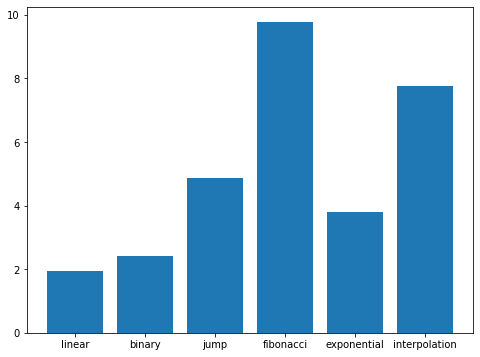

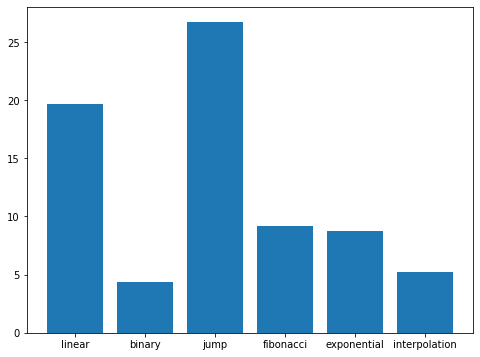

In [58]:
time_dict1 = {'linear':1.95,
              'binary':2.4,
              'jump':4.87,
              'fibonacci':9.77,
              'exponential':3.8,
              'interpolation':7.76}

plt.figure(figsize=(8,6))
plt.bar(time_dict1.keys(), time_dict1.values())
plt.show()

time_dict2 = {'linear':19.7,
              'binary':4.37,
              'jump':26.7,
              'fibonacci':9.15,
              'exponential':8.76,
              'interpolation':5.26}

plt.figure(figsize=(8,6))
plt.bar(time_dict2.keys(), time_dict2.values())
plt.show()

Из анализа скорости работы алгоритмов поиска на массиве из 100 элементов можно сделать вывод, что разные алгоритмы имеют разную эффективность в зависимости от условий поиска (в каком месте находится искомый элемент). Например, для поиска элемента с индексом 5 наиболее эффективным оказался линейный поиск, а для поиска элемента с индексом 95 - бинарный поиск.

##### Задание 4: Проведите анализ скорости работы всех рассмотренных алгоритмов сортировки на массиве, состоящем из 100 значений (значения массива должны быть последовательными от 1 до 100). 

Алгоритмы сортировки, анализ скорости работы алгоритмов

In [237]:
import timeit

# Генерация массива
arr = list(range(1, 101))

# Сортировка пузырьком
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

time_bubble = timeit.timeit('bubble_sort(arr.copy())', globals=globals(), number=1000)

# Быстрая сортировка
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

time_quick = timeit.timeit('quick_sort(arr.copy())', globals=globals(), number=1000)

# Сортировка слиянием
def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    return merge(left, right)

def merge(left, right):
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result += left[i:]
    result += right[j:]
    return result

time_merge = timeit.timeit('merge_sort(arr.copy())', globals=globals(), number=1000)

# Функция сортировки выборкой
def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_idx = i
        for j in range(i+1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr

time_selection = timeit.timeit('selection_sort(arr.copy())', globals=globals(), number=1000)

# Функция сортировки вставками
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >=0 and key < arr[j] :
                arr[j + 1] = arr[j]
                j -= 1
        arr[j + 1] = key
    return arr

time_insertion = timeit.timeit('insertion_sort(arr.copy())', globals=globals(), number=1000)

print(f'Время сортировки пузырьком: {time_bubble}')
print(f'Время быстрой сортировки: {time_quick}')
print(f'Время сортировки слиянием: {time_merge}')
print(f'Время сортировки выборкой: {time_selection}')
print(f'Время сортировки вставками: {time_insertion}')

Время сортировки пузырьком: 0.7753804000003583
Время быстрой сортировки: 0.29476619999877585
Время сортировки слиянием: 0.3410855000001902
Время сортировки выборкой: 0.6095580999990489
Время сортировки вставками: 0.042271800000889925


##### Задание 5: Проведите анализ скорости работы всех рассмотренных алгоритмов сортировки на массиве, состоящем из 100 значений (значения массива должны иметь обратную последовательность от 100 до 1).

In [238]:
# Генерация массива со значениями от 100 до 1
array = list(range(100, 0, -1))

# Сортировка пузырьком
def bubble_sort(array):
    n = len(array)
    for i in range(n):
        for j in range(0, n-i-1):
            if array[j] > array[j+1]:
                array[j], array[j+1] = array[j+1], array[j]
    return array

time_bubble1 = timeit.timeit('bubble_sort(array.copy())', globals=globals(), number=1000)

# Быстрая сортировка
def quick_sort(array):
    if len(array) <= 1:
        return array
    pivot = array[len(array) // 2]
    left = [x for x in array if x < pivot]
    middle = [x for x in array if x == pivot]
    right = [x for x in array if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

time_quick1 = timeit.timeit('quick_sort(array.copy())', globals=globals(), number=1000)

# Сортировка слиянием
def merge_sort(array):
    if len(array) <= 1:
        return array
    mid = len(array) // 2
    left = merge_sort(array[:mid])
    right = merge_sort(array[mid:])
    return merge(left, right)

def merge(left, right):
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result += left[i:]
    result += right[j:]
    return result

time_merge1 = timeit.timeit('merge_sort(array.copy())', globals=globals(), number=1000)

# Функция сортировки выборкой
def selection_sort(array):
    n = len(array)
    for i in range(n):
        min_idx = i
        for j in range(i+1, n):
            if array[j] < array[min_idx]:
                min_idx = j
        array[i], array[min_idx] = array[min_idx], array[i]
    return array

time_selection1 = timeit.timeit('selection_sort(array.copy())', globals=globals(), number=1000)

# Функция сортировки вставками
def insertion_sort(array):
    for i in range(1, len(array)):
        key = array[i]
        j = i - 1
        while j >=0 and key < array[j] :
                array[j + 1] = array[j]
                j -= 1
        array[j + 1] = key
    return array

time_insertion1 = timeit.timeit('insertion_sort(array.copy())', globals=globals(), number=1000)

print(f'Время сортировки пузырьком: {time_bubble1}')
print(f'Время быстрой сортировки: {time_quick1}')
print(f'Время сортировки слиянием: {time_merge1}')
print(f'Время сортировки выборкой: {time_selection1}')
print(f'Время сортировки вставками: {time_insertion1}')

Время сортировки пузырьком: 2.084938100000727
Время быстрой сортировки: 0.2674213999998756
Время сортировки слиянием: 0.39579000000048836
Время сортировки выборкой: 0.8538193999993382
Время сортировки вставками: 1.4581602000016574


##### Задание 6: Сделайте выводы по скорости работы алгоритмов сортировки в разных условиях из 4 и 5 задач. Постройте 2 графика сравнения этих скоростей.



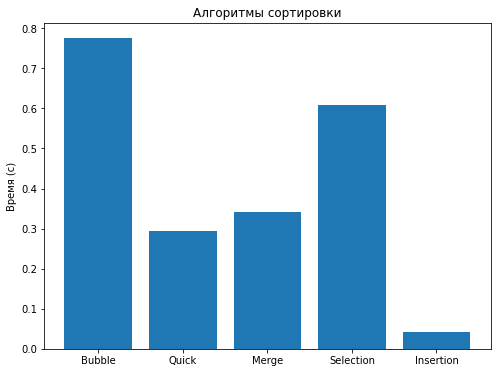

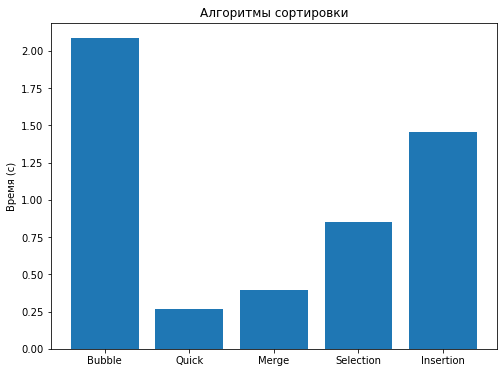

In [240]:
# Построение графика скоростей всех алгоритмов
plt.figure(figsize=(8,6))
plt.bar(['Bubble', 'Quick', 'Merge', 'Selection', 'Insertion'], [time_bubble, time_quick, time_merge, time_selection, time_insertion])
plt.ylabel('Время (с)')
plt.title('Алгоритмы сортировки')
plt.show()

# Построение графика скоростей всех алгоритмов
plt.figure(figsize=(8,6))
plt.bar(['Bubble', 'Quick', 'Merge', 'Selection', 'Insertion'], [time_bubble1, time_quick1, time_merge1, time_selection1, time_insertion1])
plt.ylabel('Время (с)')
plt.title('Алгоритмы сортировки')
plt.show()

Из анализа скорости работы алгоритмов сортировки на массиве из 100 значений можно сделать вывод, что разные алгоритмы имеют разную эффективность в зависимости от условий сортировки. Например, для сортировки массива, состоящего из последовательных 100 элементов, наиболее эффективным алгоритмом является сортировка вставками, а для массива с обратным порядком - быстрая. 